In [1]:
import numpy as np
import scipy
import io
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
Lx = 1.0
Ly = 1.1
ky =2.*math.pi/Ly
kx =2.*math.pi/Lx
L = 1.0/np.sqrt(2.)
V = 1.291
k = np.sqrt(kx*kx+ky*ky)

In [3]:
delx = []
delx2 = []
delx3 = []
delx4 = []
delx5 = []
delx6 = []
delx7 = []
delx8 = []
dissipation = []
dissipation2 = []
dissipation3 = []
dissipation4 = []
dissipation5 = []
dissipation6 = []
dissipation7 = []
dissipation8 = []
plot = []
plot2 = []
plot3 = []
plot4 = []
plot5 = []
plot6 = []
plot7 = []
plot8 = []


In [5]:
res = (8, 16, 32, 64, 128)

for r in res:
    filename = "../data/sound2D_ly1.1_USM_res"+str(r)+".dat"
    f = open(filename, "r")
    dx = 1./float(r)
    delx5.append(dx)
    time5, ekin5 = np.loadtxt(filename,usecols=(0,6),skiprows=2,unpack = True)
    logekin5 = [math.log(y) for y in ekin5]
    damping,b= np.polyfit(time5,logekin5,1)
    #print r, b, damping
    diss = -2.*damping/pow(k,2.)
    dissipation5.append(diss)
    plot5.append(damping)
    print r, dx, diss

for r in res:
    filename = "../data/sound2D_ly1.1_GLMrk2_res"+str(r)+".dat"
    f = open(filename, "r")
    dx = 1./float(r)
    delx6.append(dx)
    time6, ekin6 = np.loadtxt(filename,usecols=(0,6),skiprows=2,unpack = True)
    logekin6 = [math.log(y) for y in ekin6]
    damping,b= np.polyfit(time6,logekin6,1)
    #print r, b, damping
    diss = -2.*damping/pow(k,2.)
    dissipation6.append(diss)
    plot6.append(damping)
    print r, dx, diss

res = (8, 16, 32, 64)#, 128)#, 256)#, 512, 1024)
for r in res:
    filename = "../data/sound2D_ly1.1_Weno5rk2_res"+str(r)+".dat"
    f = open(filename, "r")
    dx = 1./float(r)
    delx7.append(dx)
    time7, ekin7 = np.loadtxt(filename,usecols=(0,6),skiprows=2,unpack = True)
    logekin7 = [math.log(y) for y in ekin7]
    damping,b= np.polyfit(time7,logekin7,1)
    #print r, b, damping
    diss = -2.*damping/pow(k,2.)
    dissipation7.append(diss)
    plot7.append(damping)
    print r, dx, diss

8 0.125 0.0076263044163
16 0.0625 0.00135605112298
32 0.03125 0.000206921569565
64 0.015625 1.80730096927e-05
128 0.0078125 2.48591261182e-06
8 0.125 0.00539028699452
16 0.0625 0.00069789571793
32 0.03125 8.77423457543e-05
64 0.015625 1.09939269264e-05
128 0.0078125 1.37902450173e-06
8 0.125 0.000188468203954
16 0.0625 5.55721311651e-06
32 0.03125 1.91456001105e-07
64 0.015625 1.92285348381e-08


In [6]:
lndelx5 = [math.log(y) for y in delx5]
lndiss5 = [math.log(x) for x in dissipation5]
m,b = np.polyfit(lndelx5,lndiss5,1)
#print m,b
fit_tot = math.exp(b)*(math.pow(L,(m-1))/V)
print m,fit_tot

lndelx6 = [math.log(y) for y in delx6]
lndiss6 = [math.log(x) for x in dissipation6]
m,b = np.polyfit(lndelx6,lndiss6,1)
#print m,b
fit_tot = math.exp(b)*(math.pow(L,(m-1))/V)
print m,fit_tot

lndelx7 = [math.log(y) for y in delx7]
lndiss7 = [math.log(x) for x in dissipation7]
m,b = np.polyfit(lndelx7,lndiss7,1)
#print m,b
fit_tot = math.exp(b)*(math.pow(L,(m-1))/V)
print m,fit_tot

2.93954166263 1.6526358858
2.98532293452 1.05555028932
4.46356308583 0.363732276991


In [14]:
logdelx5 = [math.log10(y) for y in delx5]
logdiss5 = [math.log10(y) for y in dissipation5]
logdelx6 = [math.log10(y) for y in delx6]
logdiss6 = [math.log10(y) for y in dissipation6]
logdelx7 = [math.log10(y) for y in delx7]
logdiss7 = [math.log10(y) for y in dissipation7]

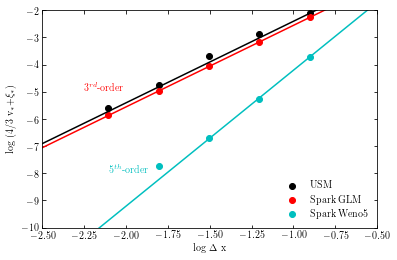

In [23]:
lgdelx = np.linspace(-5,-0.5,20)

plt.figure(1)
colors = iter(cm.rainbow(np.linspace(0, 10, 10)))
plt.xlabel(r'log $\Delta$ x')
plt.ylabel(r'log (4/3 v$_{*}$+$\xi_{*}$)')
plt.scatter(logdelx5, logdiss5, color = 'k', label = 'USM')
y = [3.*dx+0.5915 for dx in lgdelx]
plt.plot(lgdelx,y, color = 'k')
plt.scatter(logdelx6, logdiss6, color = 'r', label = 'Spark GLM')
y = [3.*dx+0.44088 for dx in lgdelx]
plt.plot(lgdelx,y, color = 'r')
plt.scatter(logdelx7, logdiss7, color = 'c', label = 'Spark Weno5')
y = [5*dx+0.7906 for dx in lgdelx]
plt.plot(lgdelx,y, color = 'c')
plt.legend(loc = 'lower right',frameon = False)
plt.text(-2.25,-5,r'$3^{rd}$-order', color = 'r')
plt.text(-2.1,-8,r'$5^{th}$-order',color = 'c')
plt.axis([-2.5,-0.5,-10,-2])
plt.savefig('sound2D.pdf', orientation = 'landscape', format = None)
plt.show()
